In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [3]:
mpl.rcParams["figure.figsize"]=[14 , 7]
mpl.rcParams["font.size"]=15
mpl.rcParams["legend.fontsize"]="medium"
mpl.rcParams["figure.titlesize"]="medium"

In [4]:
dataset=pd.read_csv('dataset.csv')

In [5]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
dataset.info()
## Showing information about datase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
dataset.describe()
## Showing data's statistical features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
dataset['age'].nunique()
# Returns number of unique values in this attribute

41

In [10]:
print('Value Counts\n',dataset['sex'].value_counts())
#val 0:Female,val 1:Male

Value Counts
 1    207
0     96
Name: sex, dtype: int64


In [11]:
print('total unique value of heartdisease\n',dataset['cp'].unique())
#Prints unique values of Chest Pain Type

total unique value of heartdisease
 [3 2 1 0]


In [12]:
print('total value counts of heartdisease\n',dataset['cp'].value_counts())
# Above code will return unique value for heart disease attribute and its value counts
#val 0:typical angina,val 1:atypical angina,val 2:non-anginal pain,val 3: asymptomatic

total value counts of heartdisease
 0    143
2     87
1     50
3     23
Name: cp, dtype: int64


In [13]:
dataset['trestbps'].nunique()
# Returns number of unique values in this attribute

49

In [14]:
print('Unique Value\n',dataset['fbs'].unique())

Unique Value
 [1 0]


In [15]:
print('Value Counts\n',dataset['fbs'].value_counts())
#fasting blood sugar>120 mg/dl(1=true,0=false)

Value Counts
 0    258
1     45
Name: fbs, dtype: int64


In [16]:
print('Unique Value\n',dataset['restecg'].unique())

Unique Value
 [0 1 2]


In [17]:
print('Value Counts\n',dataset['restecg'].value_counts())
#val0:normal,val1:ST-T wave abnormality,val2:shows left ventricular hypertrophy

Value Counts
 1    152
0    147
2      4
Name: restecg, dtype: int64


In [18]:
dataset['thalach'].nunique()
# Returns number of unique values in this attribute

91

In [19]:
print('Unique Value\n',dataset['exang'].unique())

Unique Value
 [0 1]


In [20]:
print('Value Counts\n',dataset['exang'].value_counts())
# Above code will return unique value for heart disease attribute and its value counts
#exercise induced angina(1=yes,0=no)

Value Counts
 0    204
1     99
Name: exang, dtype: int64


In [21]:
print('Unique Value\n',dataset['slope'].unique())

Unique Value
 [0 2 1]


In [22]:
print('Value Counts\n',dataset['slope'].value_counts())
# Above code will return unique value for heart disease attribute and its value counts
#val0:unsloping,val1:flat,val2:downsloping

Value Counts
 2    142
1    140
0     21
Name: slope, dtype: int64


In [23]:
print('Value Counts\n',dataset['target'].value_counts())
#val1:yes,val0:no

Value Counts
 1    165
0    138
Name: target, dtype: int64


In [24]:
categorical_val = []
continous_val = []
for column in dataset.columns:
    print('==============================')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

<AxesSubplot:>

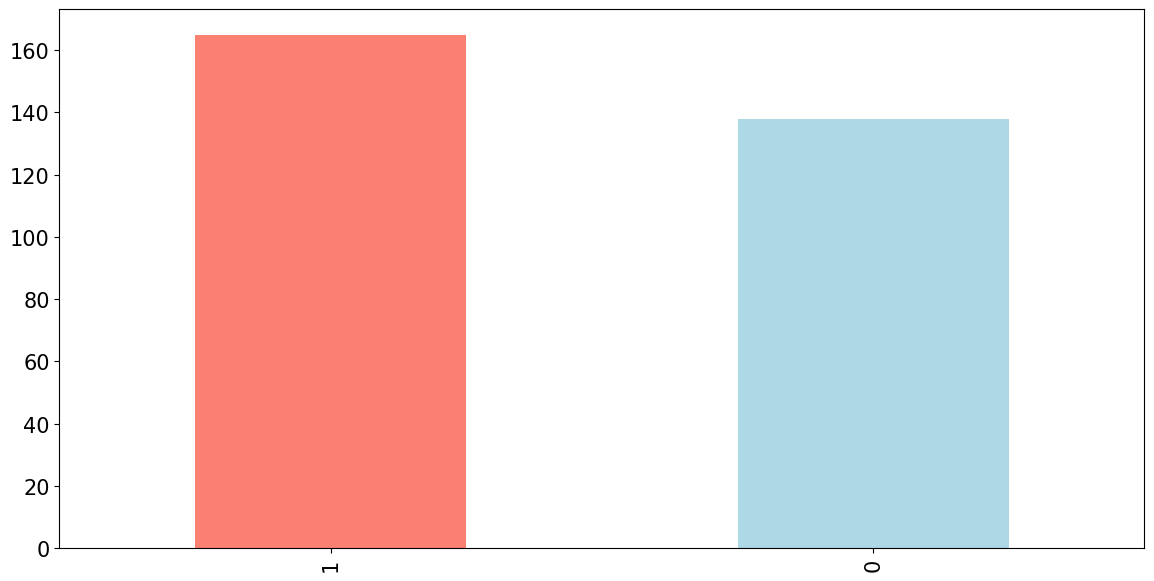

In [25]:
dataset.target.value_counts().plot(kind="bar", color=["salmon","lightblue"])

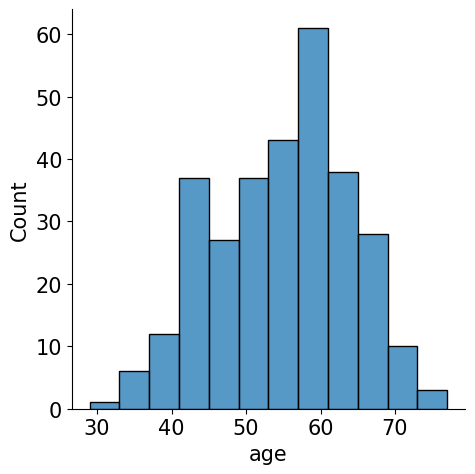

In [26]:
sns.displot(dataset['age'])
# This will plot a distribution plot of variable age

<AxesSubplot:xlabel='target', ylabel='age'>

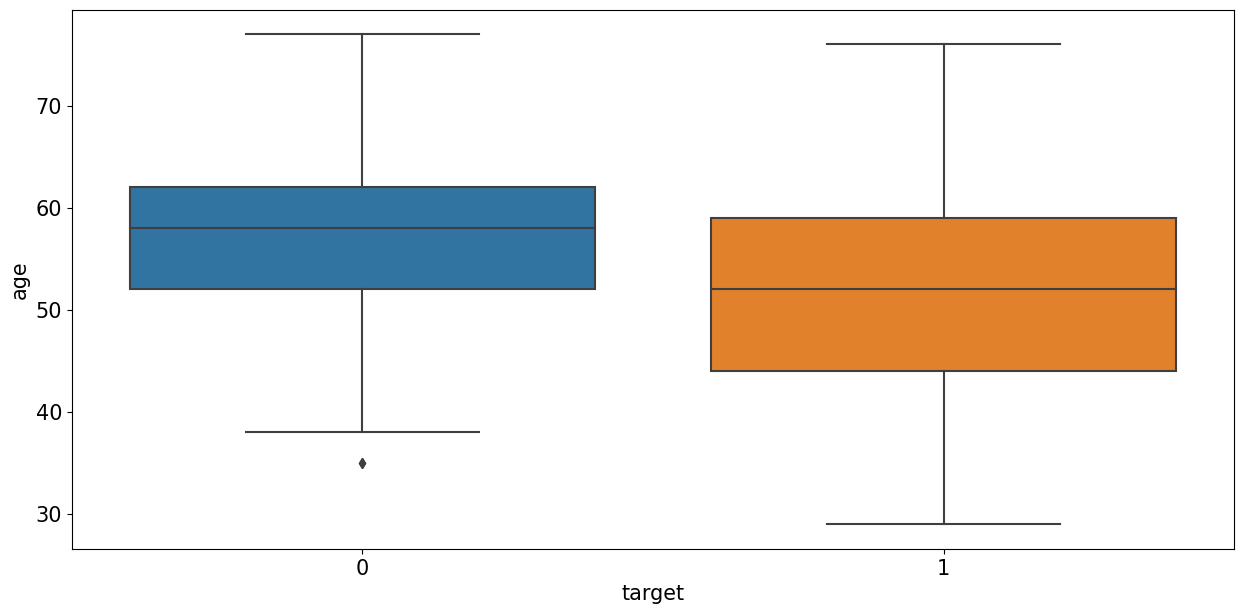

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(data=dataset,x='target',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

<AxesSubplot:xlabel='sex', ylabel='count'>

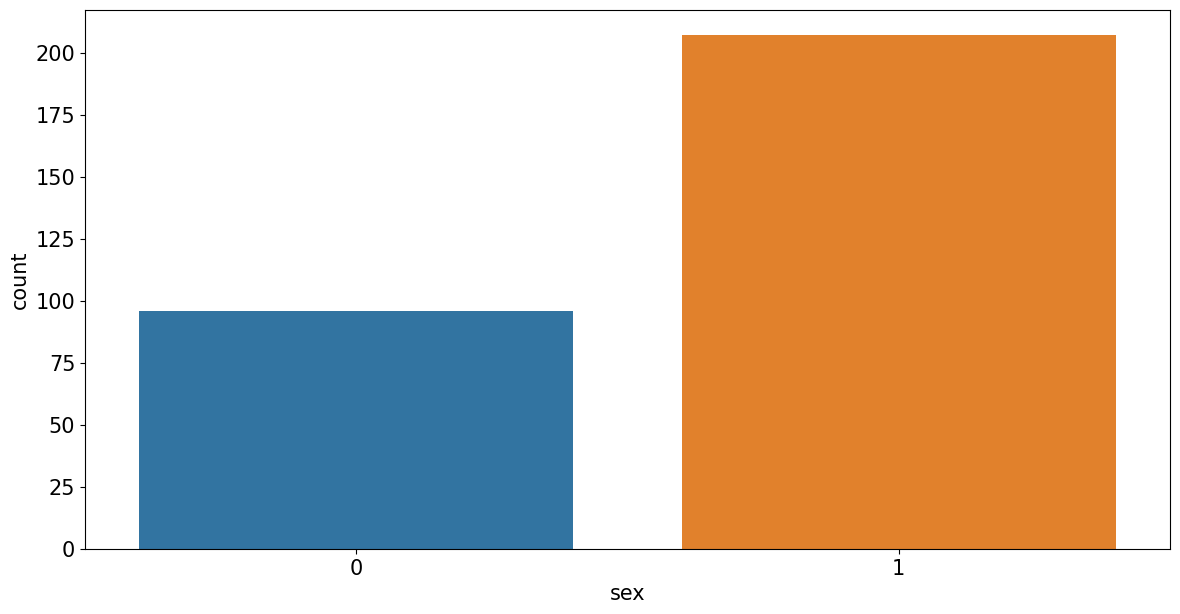

In [28]:
sns.countplot(data=dataset,x='sex')
# Helps to plot a count plot which will help us to see count of values in each unique category.
# val 0 :Female val 1:Male

<AxesSubplot:xlabel='sex', ylabel='count'>

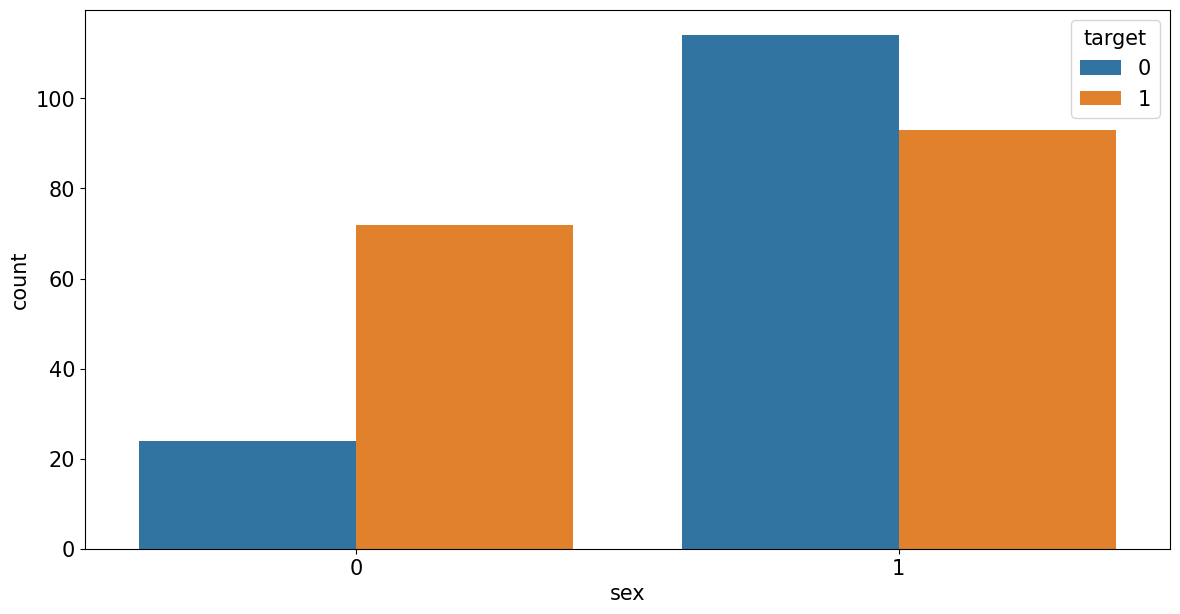

In [29]:
sns.countplot(data=dataset,x='sex',hue='target')
# This plot will help to analyze how gender will affect chances of stroke.

<AxesSubplot:xlabel='cp', ylabel='count'>

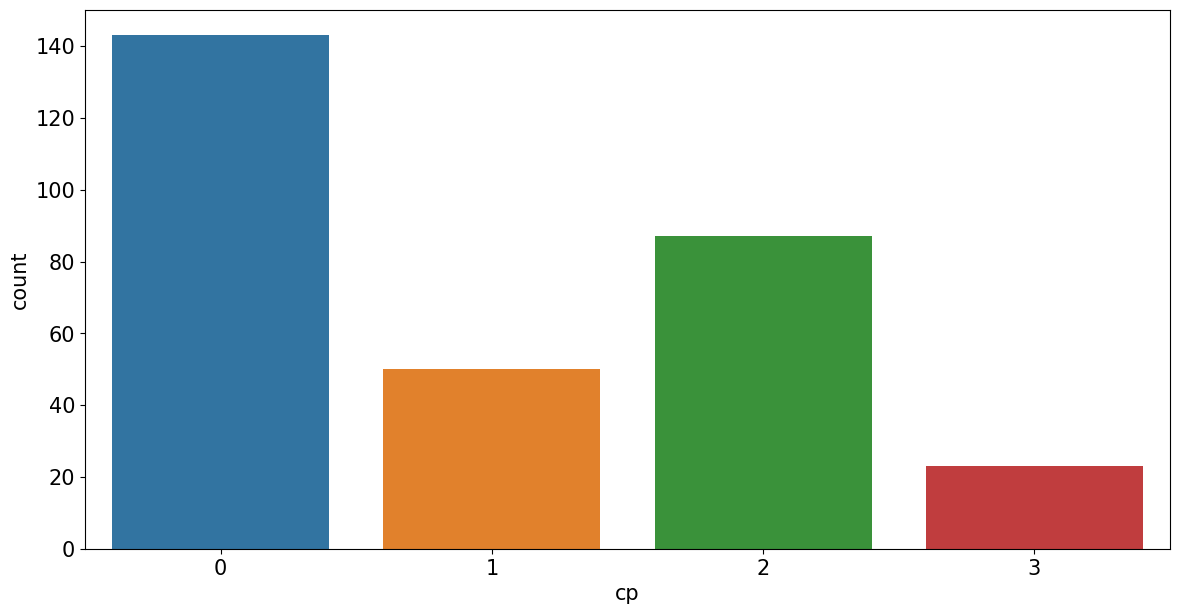

In [30]:
sns.countplot(data=dataset,x='cp')
# Will plot a counter plot of variable heart diseases
#val 0:typical angina,val 1:atypical angina,val 2:non-anginal pain,val 3: asymptomatic

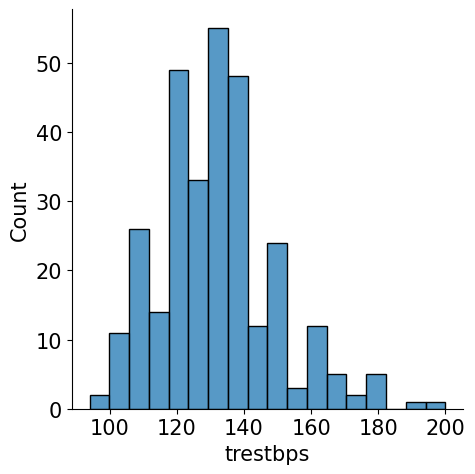

In [31]:
sns.displot(dataset['trestbps'])
# This will plot a distribution plot of variable age

<AxesSubplot:xlabel='target', ylabel='trestbps'>

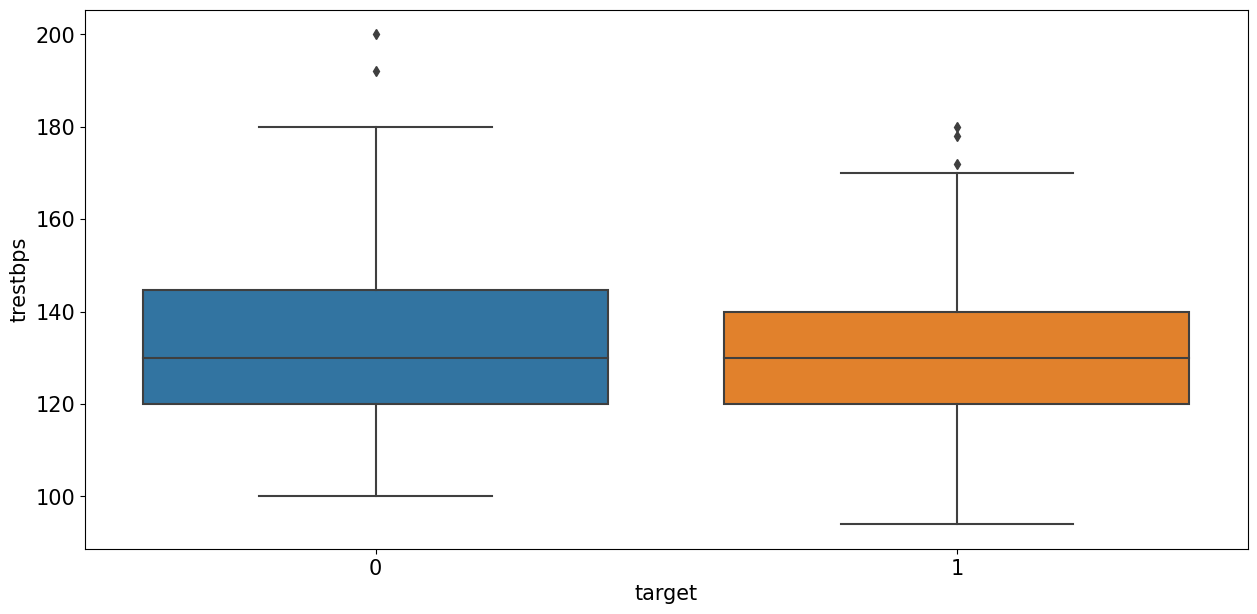

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(data=dataset,x='target',y='trestbps')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

<AxesSubplot:xlabel='trestbps', ylabel='count'>

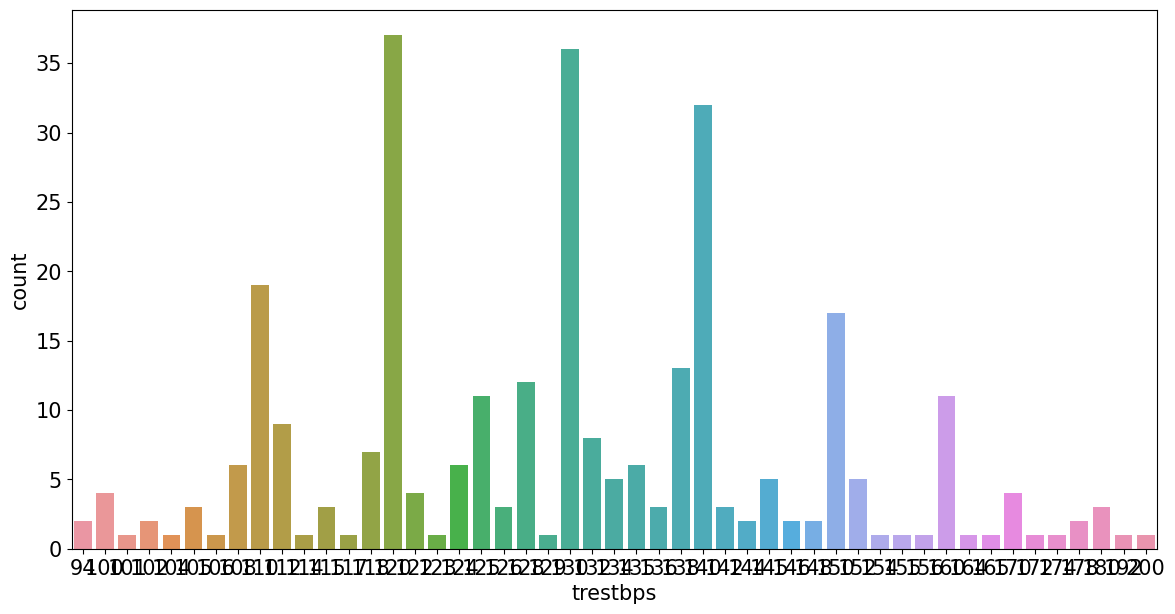

In [33]:
sns.countplot(data=dataset,x='trestbps')
# Helps to plot a count plot which will help us to see count of values in each unique category.

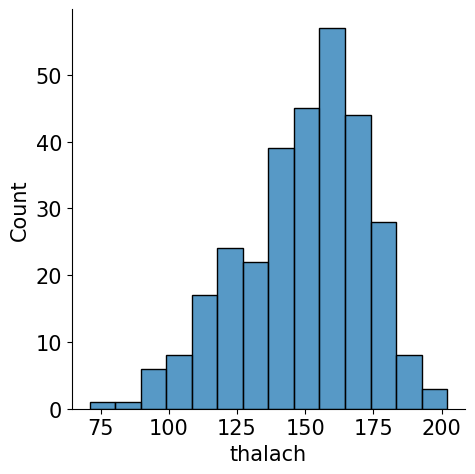

In [34]:
sns.displot(dataset['thalach'])
# This will plot a distribution plot of variable age

<AxesSubplot:xlabel='target', ylabel='thalach'>

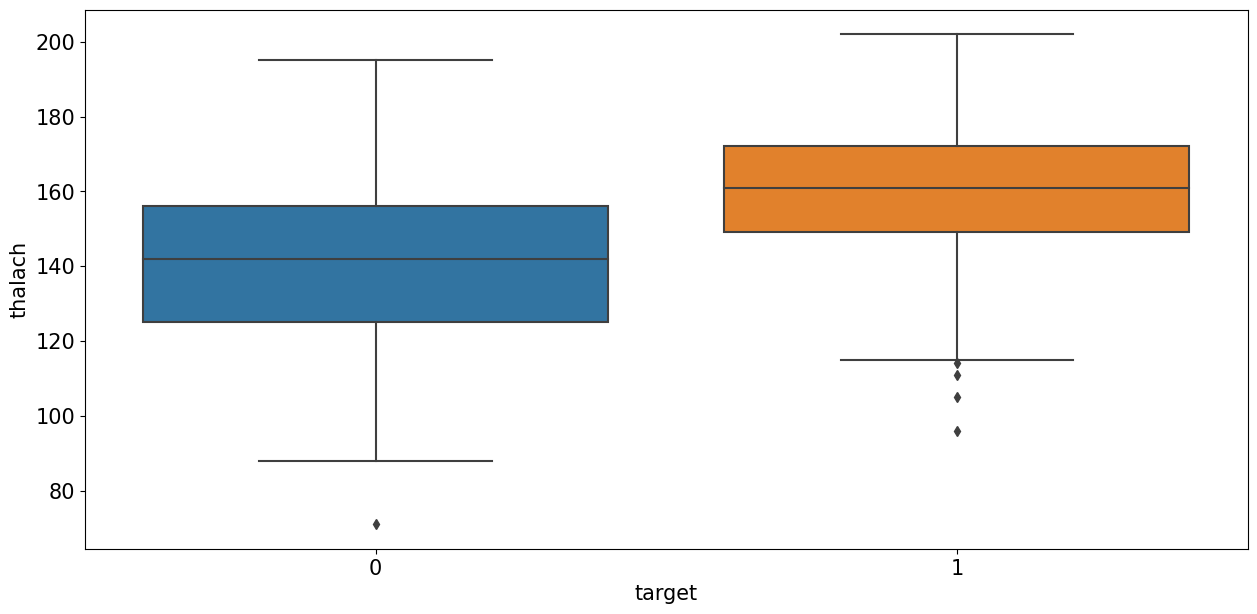

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(data=dataset,x='target',y='thalach')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

<AxesSubplot:xlabel='exang', ylabel='count'>

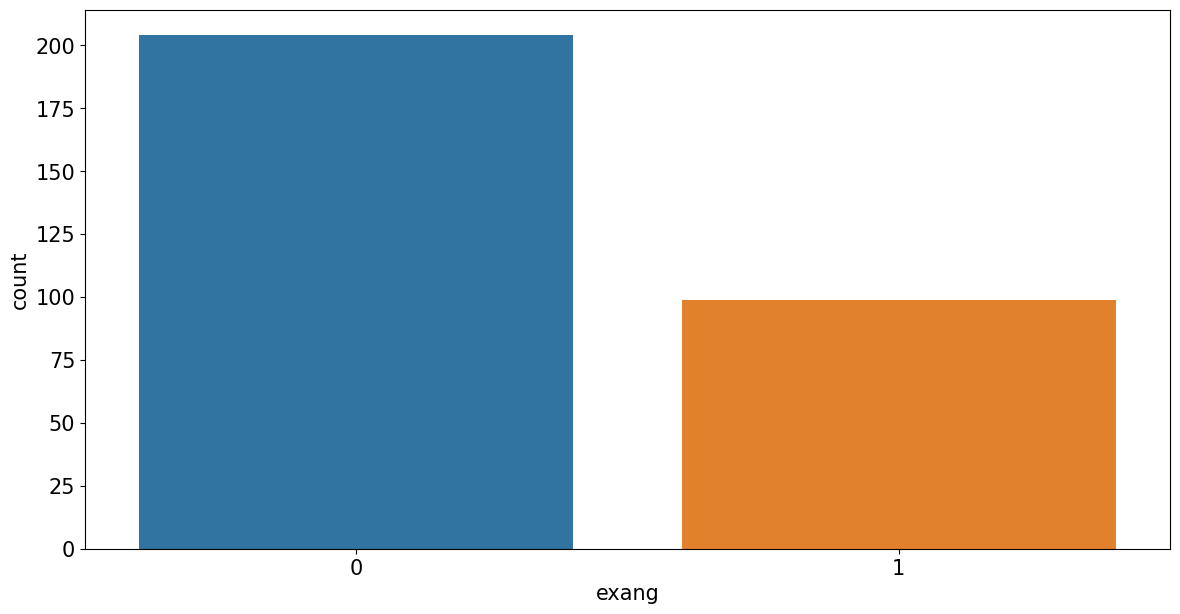

In [36]:
sns.countplot(data=dataset,x='exang')
# Will plot a counter plot of variable heart diseases

<AxesSubplot:xlabel='slope', ylabel='count'>

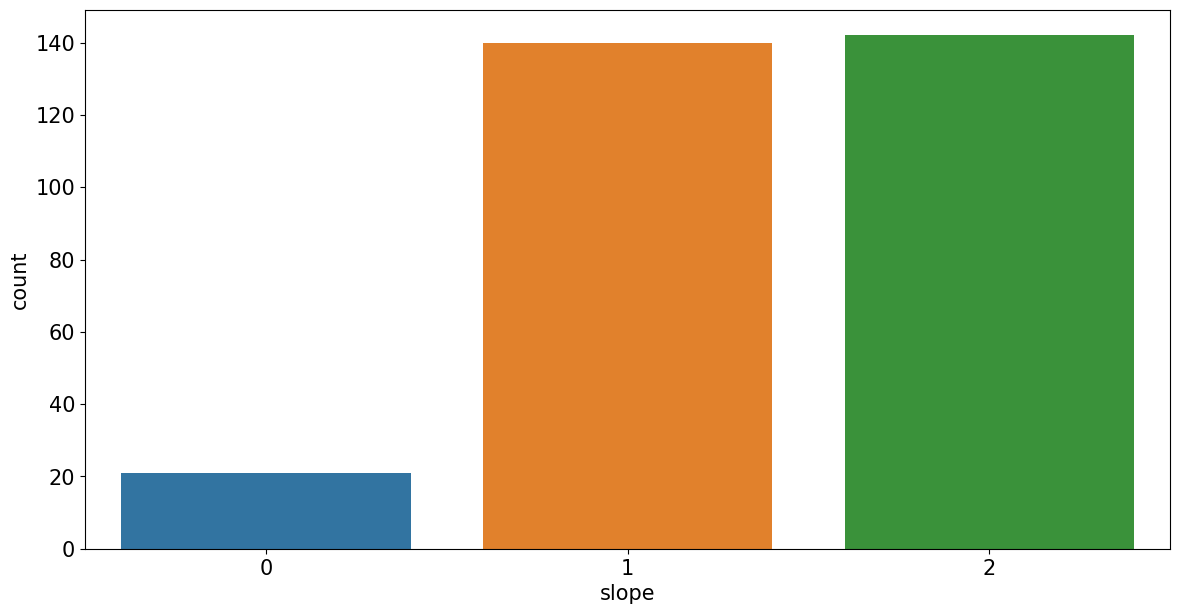

In [37]:
sns.countplot(data=dataset,x='slope')
# Will plot a counter plot of variable heart diseases

<AxesSubplot:xlabel='target', ylabel='count'>

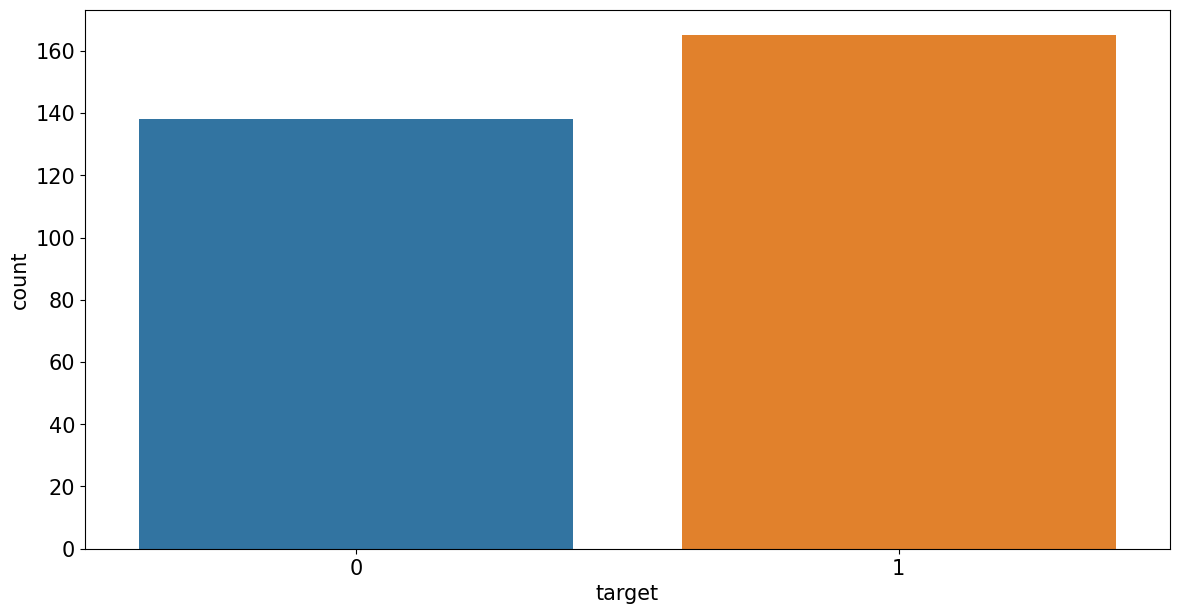

In [38]:
sns.countplot(data=dataset,x='target')

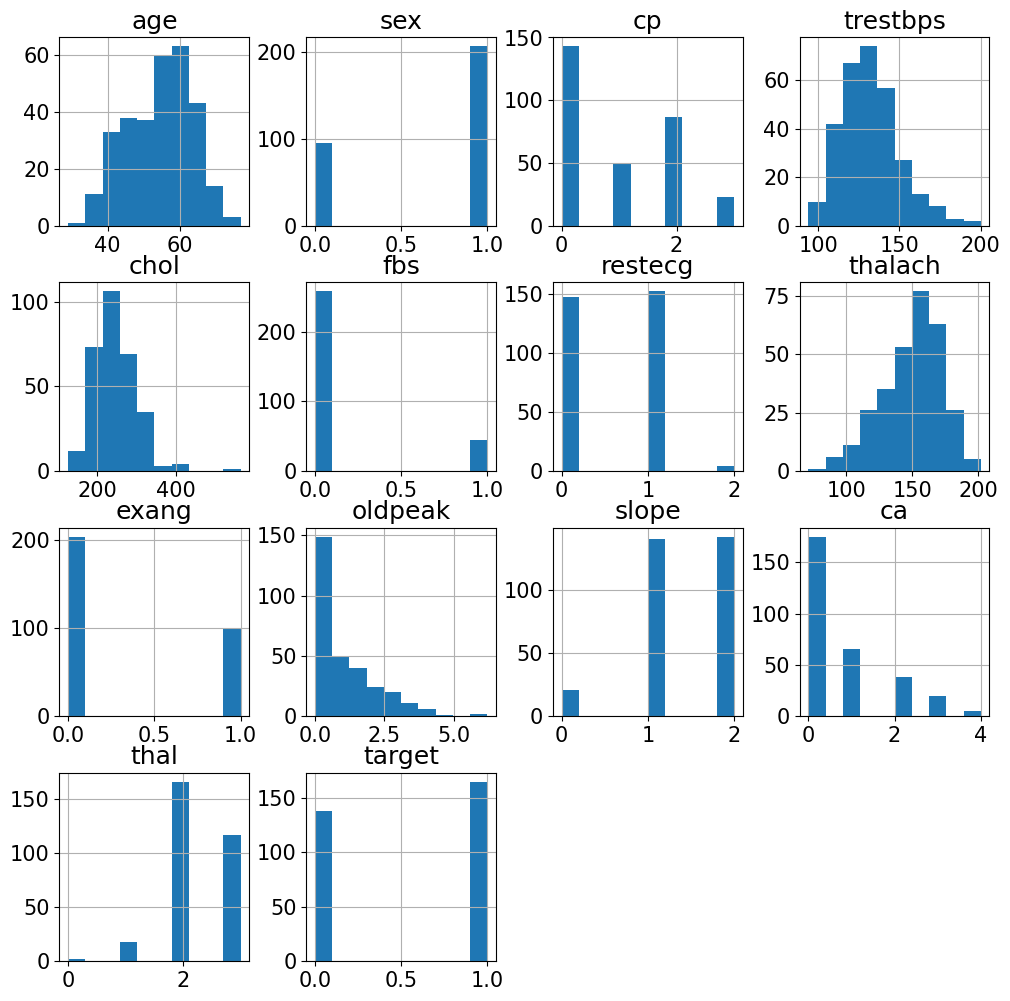

In [39]:
dataset.hist(figsize=(12,12))
plt.show()

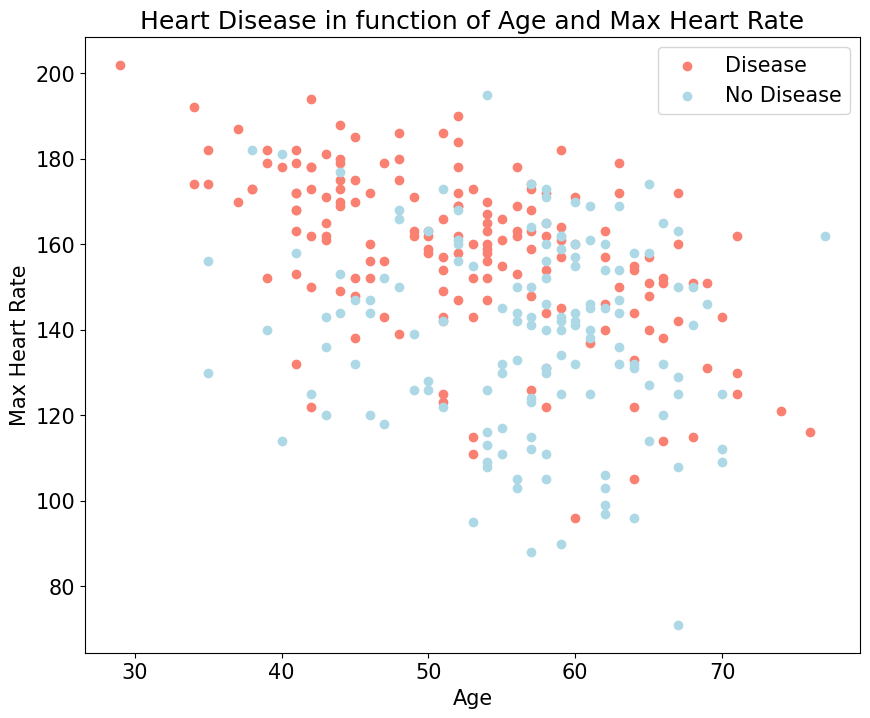

In [40]:
#SCATTER PLOT
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(dataset.age[dataset.target==1],
            dataset.thalach[dataset.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(dataset.age[dataset.target==0],
            dataset.thalach[dataset.target==0],
            c="lightblue")


# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

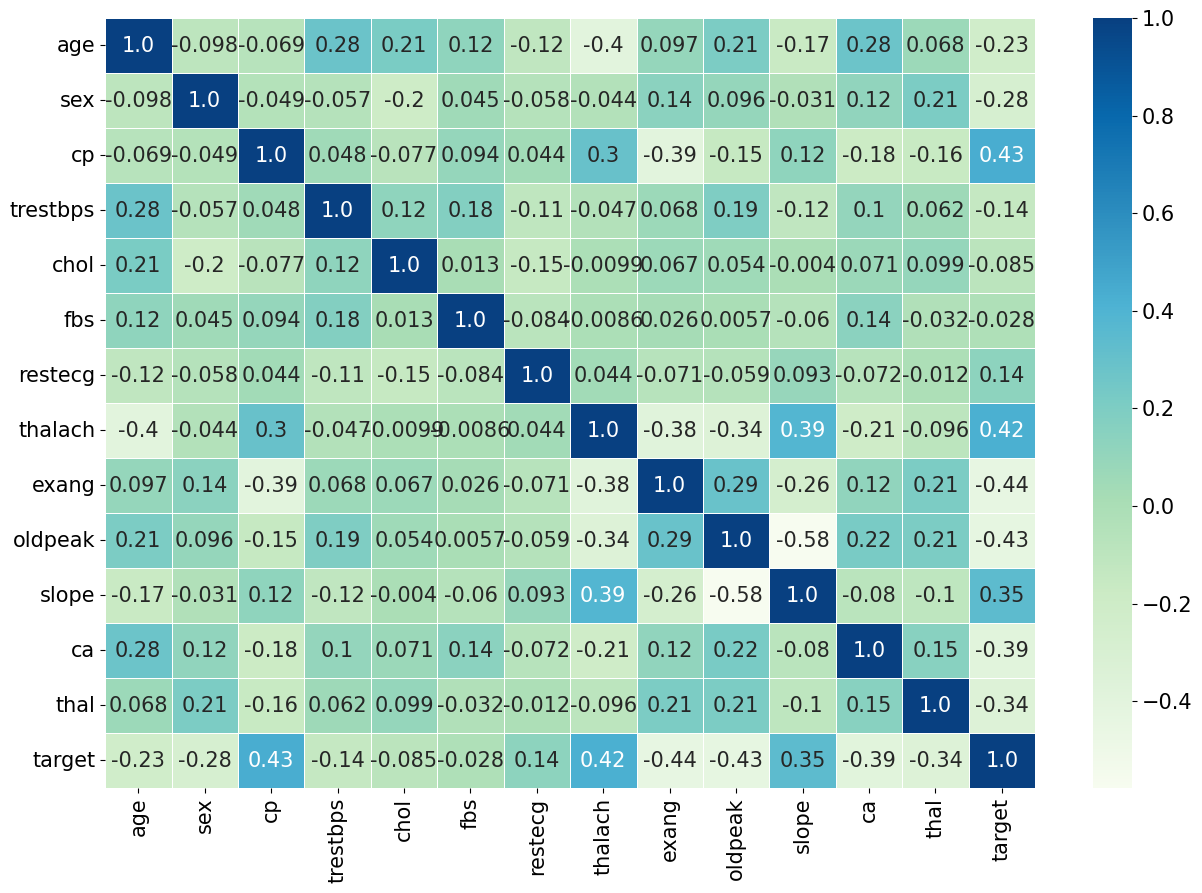

In [41]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(
    corr_matrix, 
    annot = True, 
    linewidths = 0.5,
    fmt = '0.2', 
    cmap = 'GnBu'
)

<AxesSubplot:title={'center':'Correlation with HeartDisease'}>

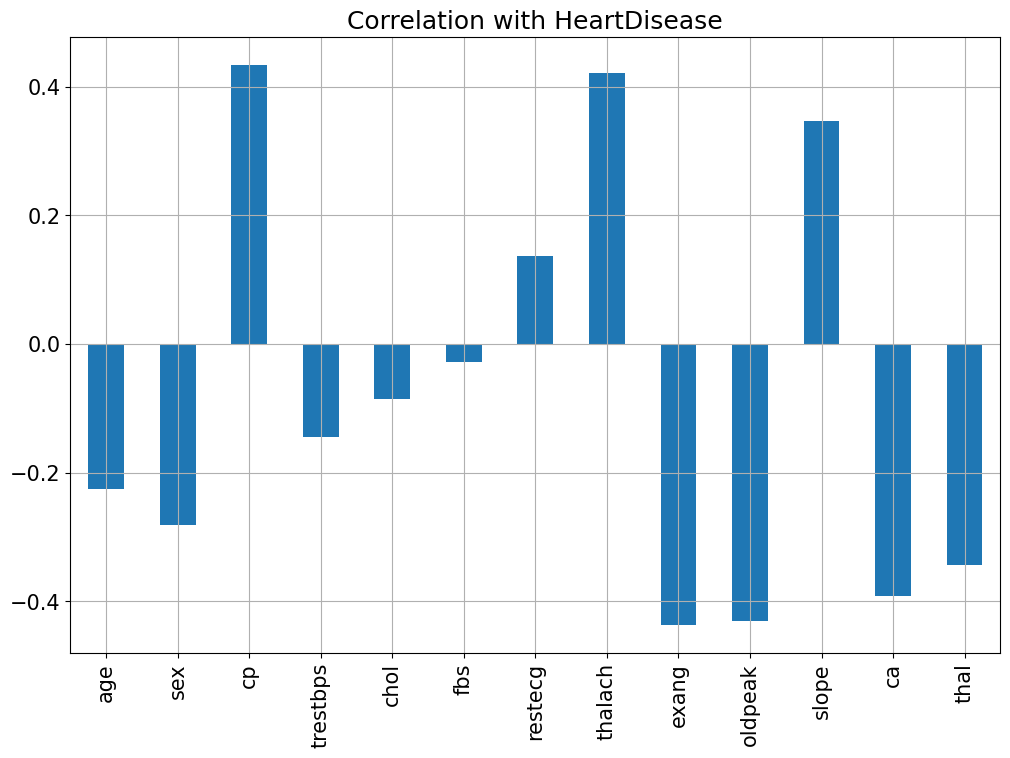

In [42]:
dataset.drop('target', axis=1).corrwith(dataset.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with HeartDisease")

In [43]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
dataset.duplicated().sum()

1

In [45]:
dataset.loc[dataset.duplicated(),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [46]:
cols=dataset.select_dtypes(include=['object']).columns
print(cols)
# This code will fetech columns whose data type is object.
le=LabelEncoder()
# Initializing our Label Encoder object
dataset[cols]=dataset[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(dataset.head(10))

Index([], dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2     

In [47]:
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
x=dataset[columns]
y=dataset.target

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25,random_state=1234)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
print(X_train_std)
print(X_test_std)
print(Y_train)
print(Y_test)
#X_std.head()

[[-1.22031583  0.6815542  -0.91319067 ...  0.37012453 -0.43709968
  -1.08751658]
 [ 0.25920431  0.6815542  -0.91319067 ... -0.68010382 -2.01204613
   0.91952621]
 [-0.19603266  0.6815542   1.00620084 ...  2.47058122 -0.43709968
   0.91952621]
 ...
 [-1.22031583 -1.46723474  1.00620084 ... -0.68010382 -0.43709968
   0.91952621]
 [-1.22031583  0.6815542  -0.91319067 ... -0.68010382 -2.01204613
  -1.08751658]
 [ 0.71444127  0.6815542  -0.91319067 ...  0.37012453  1.13784678
  -1.08751658]]
[[ 0.94205976 -1.46723474 -0.91319067 ...  1.42035287 -0.43709968
  -1.08751658]
 [ 0.48682279  0.6815542   0.04650508 ... -0.68010382 -0.43709968
   0.91952621]
 [-1.90317128  0.6815542   1.00620084 ...  3.52080957 -0.43709968
   0.91952621]
 ...
 [-1.33412507  0.6815542  -0.91319067 ... -0.68010382 -0.43709968
   0.91952621]
 [-1.10650659  0.6815542   1.96589659 ... -0.68010382  1.13784678
  -1.08751658]
 [ 0.94205976  0.6815542  -0.91319067 ...  0.37012453  1.13784678
  -1.08751658]]
185    0
5      

In [51]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=2000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate output variable (y) with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) #derivative w.r.t weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  #derivative w.r.t bias
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [52]:
itr=[]
acc=[]

In [53]:
regressor = LogisticRegression(learning_rate=0.0001, n_iters=2000)
regressor.fit(X_train_std, Y_train)
predictions = regressor.predict(X_test_std)
itr.append(2000)

In [54]:
score_lr = round(accuracy(Y_test, predictions)*100,2)
print("LR classification accuracy:", accuracy(Y_test, predictions))
acc.append(accuracy(Y_test, predictions))

LR classification accuracy: 0.9210526315789473


In [55]:
rc = recall_score(Y_test, predictions)
pc=precision_score(Y_test, predictions)
f1s=f1_score(Y_test, predictions)
print("\nPRECISION: {1} \nRECALL(Sensitivity): {2} \nF1 SCORE: {3}".format(acc,pc,rc,f1s))


PRECISION: 0.9090909090909091 
RECALL(Sensitivity): 0.9523809523809523 
F1 SCORE: 0.9302325581395349


In [56]:
print_score(regressor, X_train_std, Y_train, X_test_std, Y_test, train=True)
print_score(regressor, X_train_std, Y_train, X_test_std, Y_test, train=False)

Train Result:
Accuracy Score: 95.15%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.951456    0.951613  0.951542    0.951535      0.951541
recall       0.942308    0.959350  0.951542    0.950829      0.951542
f1-score     0.946860    0.955466  0.951542    0.951163      0.951523
support    104.000000  123.000000  0.951542  227.000000    227.000000
_______________________________________________
Confusion Matrix: 
 [[ 98   6]
 [  5 118]]

Test Result:
Accuracy Score: 92.11%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.937500   0.909091  0.921053   0.923295      0.921800
recall      0.882353   0.952381  0.921053   0.917367      0.921053
f1-score    0.909091   0.930233  0.921053   0.919662      0.920774
support    34.000000  42.000000  0.921053  76.000000     76.000000
________


Test confusion_matrix


Text(139.72222222222223, 0.5, 'True')

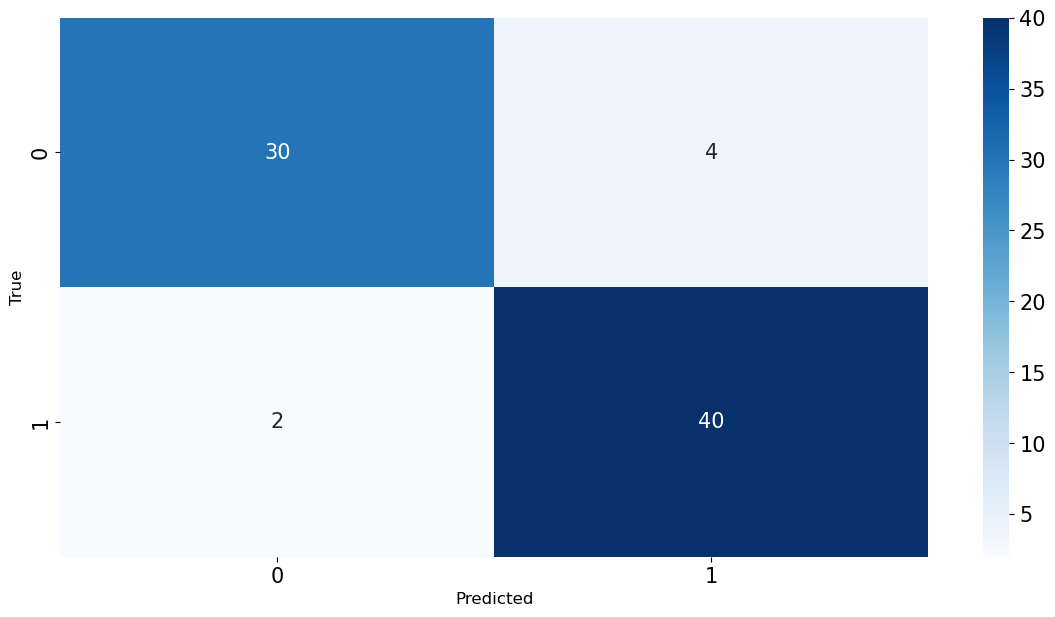

In [57]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, predictions)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
#Logistic Regression

In [58]:
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : predictions})
df.head(10)
#Logistic Regression

,Actual,Predicted
263,0,0
77,1,1
163,1,1
206,0,0
167,0,0
94,1,1
293,0,0
283,0,1
219,0,0
248,0,0


In [59]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
rf_all_features = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=2)
rf_all_features.fit(X_train_std,Y_train) 
y_pred = rf_all_features.predict(X_test_std)

In [60]:
print(accuracy_score(Y_test, rf_all_features.predict(X_test_std)))

0.9868421052631579


In [61]:
rc = recall_score(Y_test, y_pred)
pc=precision_score(Y_test, y_pred)
f1s=f1_score(Y_test, y_pred)
print("\nPRECISION: {1} \nRECALL(Sensitivity): {2} \nF1 SCORE: {3}".format(acc,pc,rc,f1s))


PRECISION: 0.9767441860465116 
RECALL(Sensitivity): 1.0 
F1 SCORE: 0.988235294117647


In [62]:
score_rf = round(accuracy_score(Y_test, rf_all_features.predict(X_test_std))*100,2)
print_score(rf_all_features, X_train_std, Y_train, X_test_std, Y_test, train=True)
print_score(rf_all_features, X_train_std, Y_train, X_test_std, Y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    104.0  123.0       1.0      227.0         227.0
_______________________________________________
Confusion Matrix: 
 [[104   0]
 [  0 123]]

Test Result:
Accuracy Score: 98.68%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.976744  0.986842   0.988372      0.987148
recall      0.970588   1.000000  0.986842   0.985294      0.986842
f1-score    0.985075   0.988235  0.986842   0.986655      0.986821
support    34.000000  42.000000  0.986842  76.000000     76.000000
_______________________________________________
Confusion Matr


Test confusion_matrix


Text(139.72222222222223, 0.5, 'True')

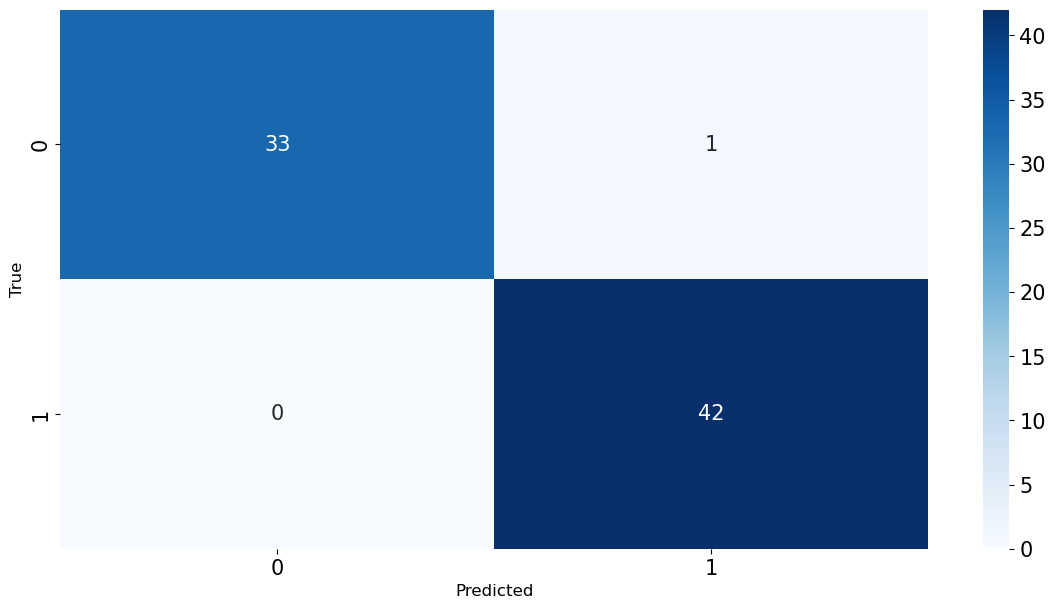

In [63]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [64]:
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
df.head(10)
#Random Forest Classifier

,Actual,Predicted
263,0,0
77,1,1
163,1,1
206,0,0
167,0,0
94,1,1
293,0,0
283,0,0
219,0,0
248,0,0


In [65]:
from sklearn.svm import SVC
  
# Building a Support Vector Machine on train data
svc_model = SVC(C= 7, kernel='rbf', gamma= 10)
svc_model.fit(X_train, Y_train)
  
prediction = svc_model .predict(X_test)
# check the accuracy on the testing data

In [66]:
print(svc_model.score(X_test, Y_test))
y_pred= svc_model.predict(X_test)

0.5526315789473685


In [67]:
rc = recall_score(Y_test, y_pred)
pc=precision_score(Y_test, y_pred)
f1s=f1_score(Y_test, y_pred)
print("\nPRECISION: {1} \nRECALL(Sensitivity): {2} \nF1 SCORE: {3}".format(acc,pc,rc,f1s))


PRECISION: 0.5526315789473685 
RECALL(Sensitivity): 1.0 
F1 SCORE: 0.711864406779661


In [68]:
score_svm = round((svc_model.score(X_test, Y_test))*100,2)
print_score(svc_model, X_train, Y_train, X_test, Y_test, train=True)
print_score(svc_model, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    104.0  123.0       1.0      227.0         227.0
_______________________________________________
Confusion Matrix: 
 [[104   0]
 [  0 123]]

Test Result:
Accuracy Score: 55.26%
_______________________________________________
CLASSIFICATION REPORT:
              0          1  accuracy  macro avg  weighted avg
precision   0.0   0.552632  0.552632   0.276316      0.305402
recall      0.0   1.000000  0.552632   0.500000      0.552632
f1-score    0.0   0.711864  0.552632   0.355932      0.393399
support    34.0  42.000000  0.552632  76.000000     76.000000
_______________________________________________
Confusion Matrix: 
 [[ 0 34]
 [ 0 42]]



Test confusion_matrix


Text(139.72222222222223, 0.5, 'True')

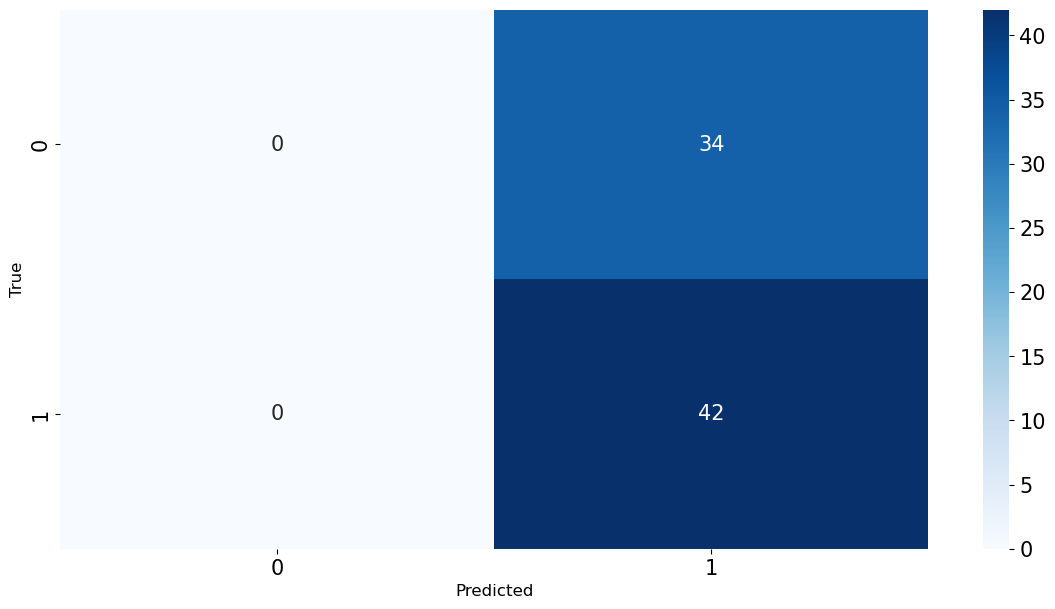

In [69]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [70]:
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
df.head(10)
#Support Vector Machine

,Actual,Predicted
263,0,1
77,1,1
163,1,1
206,0,1
167,0,1
94,1,1
293,0,1
283,0,1
219,0,1
248,0,1


Maximum accuracy:- 0.6842105263157895 at K = 6


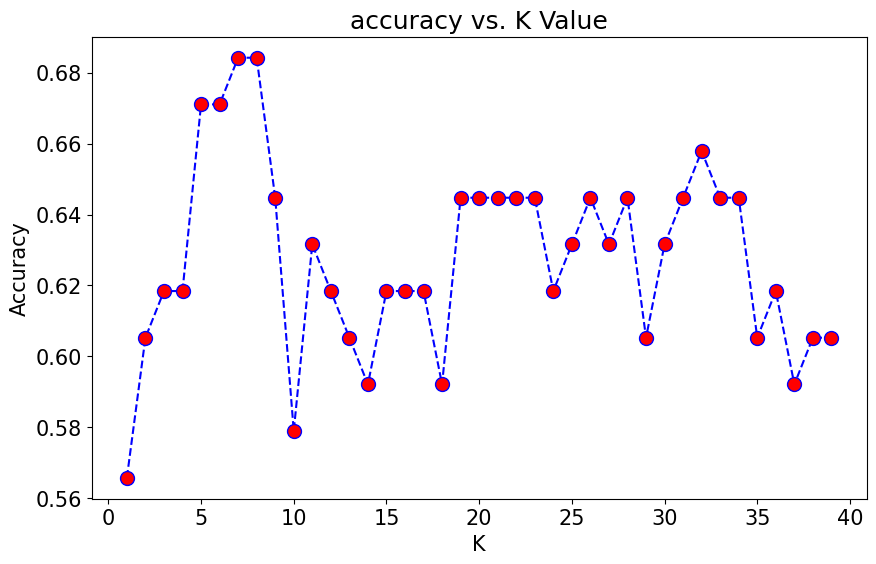

In [71]:
from sklearn.neighbors import KNeighborsClassifier
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [72]:
#Fitting K-NN classifier to the training set  
 
classifier= KNeighborsClassifier(n_neighbors=12, metric='minkowski', p=2 )  
classifier.fit(X_train_std, Y_train)  
#Predicting the test set result  
y_pred= classifier.predict(X_test_std)

In [73]:
rc = recall_score(Y_test, y_pred)
pc=precision_score(Y_test, y_pred)
f1s=f1_score(Y_test, y_pred)
print("\nPRECISION: {1} \nRECALL(Sensitivity): {2} \nF1 SCORE: {3}".format(acc,pc,rc,f1s))


PRECISION: 0.9523809523809523 
RECALL(Sensitivity): 0.9523809523809523 
F1 SCORE: 0.9523809523809523


In [74]:
score_knn = round((classifier.score(X_test_std, Y_test))*100,2)
print_score(classifier, X_train_std, Y_train, X_test_std, Y_test, train=True)
print_score(classifier, X_train_std, Y_train, X_test_std, Y_test, train=False)

Train Result:
Accuracy Score: 96.04%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961165    0.959677  0.960352    0.960421      0.960359
recall       0.951923    0.967480  0.960352    0.959701      0.960352
f1-score     0.956522    0.963563  0.960352    0.960042      0.960337
support    104.000000  123.000000  0.960352  227.000000    227.000000
_______________________________________________
Confusion Matrix: 
 [[ 99   5]
 [  4 119]]

Test Result:
Accuracy Score: 94.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.941176   0.952381  0.947368   0.946779      0.947368
recall      0.941176   0.952381  0.947368   0.946779      0.947368
f1-score    0.941176   0.952381  0.947368   0.946779      0.947368
support    34.000000  42.000000  0.947368  76.000000     76.000000
________


Test confusion_matrix


Text(139.72222222222223, 0.5, 'True')

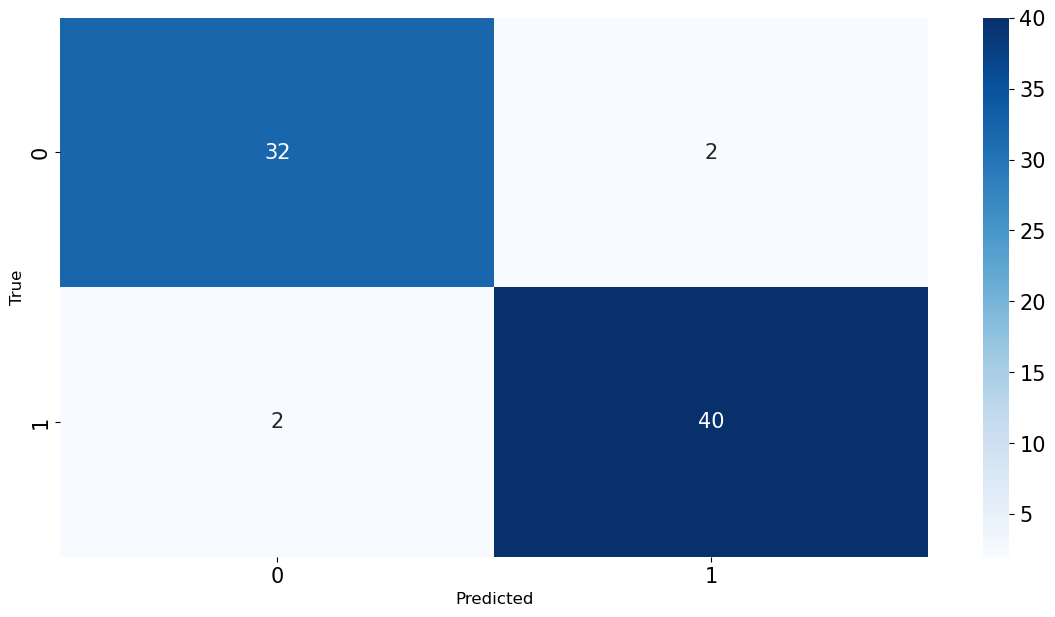

In [75]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [76]:
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
df.head(10)
#K-Nearest Neighbor

,Actual,Predicted
263,0,0
77,1,1
163,1,1
206,0,0
167,0,0
94,1,1
293,0,0
283,0,0
219,0,0
248,0,0


In [77]:
scores = [score_lr, score_rf, score_svm, score_knn]
algorithms = ["Logistic Regression","Random Forest","Support Vactor Machine","K-Nearest Neighbor"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 92.11 %
The accuracy score achieved using Random Forest is: 98.68 %
The accuracy score achieved using Support Vactor Machine is: 55.26 %
The accuracy score achieved using K-Nearest Neighbor is: 94.74 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

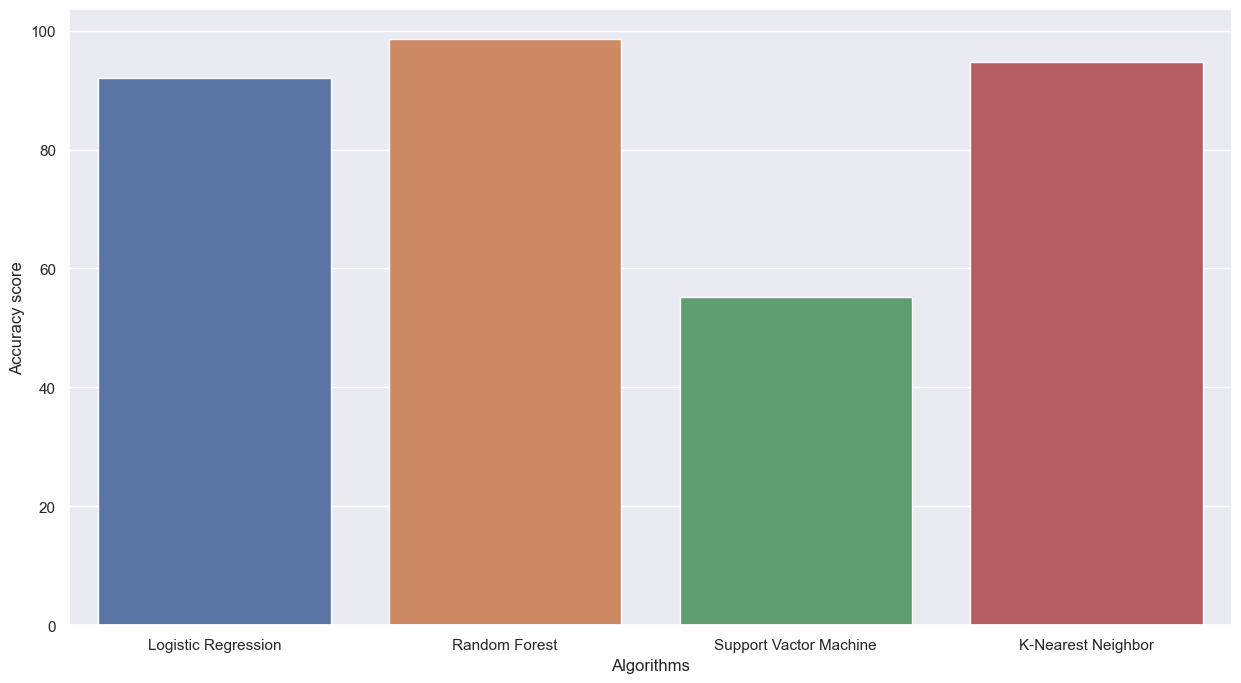

In [78]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)